## Statistic Analysis with StatsModels

## Rental prices

Business problem:

Is there any relationship between area (in sq meters) and rental value in a certain city? How to measure it?

In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.7


In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Load and Prepare Data

In [3]:
# Load the dataset
dataframe_rental = pd.read_csv('dataset.csv')

In [5]:
dataframe_rental.shape

(3000, 7)

In [6]:
dataframe_rental.columns

Index(['rental_value', 'area_sq_meters', 'construction_year', 'location_code',
       'bathroom_qty', 'kitchen_qyt', 'district_code'],
      dtype='object')

In [7]:
dataframe_rental.head()

,rental_value,area_sq_meters,construction_year,location_code,bathroom_qty,kitchen_qyt,district_code
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [8]:
dataframe_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rental_value       3000 non-null   float64
 1   area_sq_meters     3000 non-null   int64  
 2   construction_year  3000 non-null   int64  
 3   location_code      3000 non-null   int64  
 4   bathroom_qty       3000 non-null   int64  
 5   kitchen_qyt        3000 non-null   int64  
 6   district_code      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


## Exploratory Analisys - Statistic Summary

In [15]:
# Check missing values
dataframe_rental.isnull().sum()

rental_value         0
area_sq_meters       0
construction_year    0
location_code        0
bathroom_qty         0
kitchen_qyt          0
district_code        0
dtype: int64

In [16]:
# Statistic summary
dataframe_rental.describe()

,rental_value,area_sq_meters,construction_year,location_code,bathroom_qty,kitchen_qyt,district_code
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [17]:
# Statistic summary of the target variable
dataframe_rental["rental_value"].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: rental_value, dtype: float64

In [18]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

<Axes: xlabel='rental_value', ylabel='Count'>

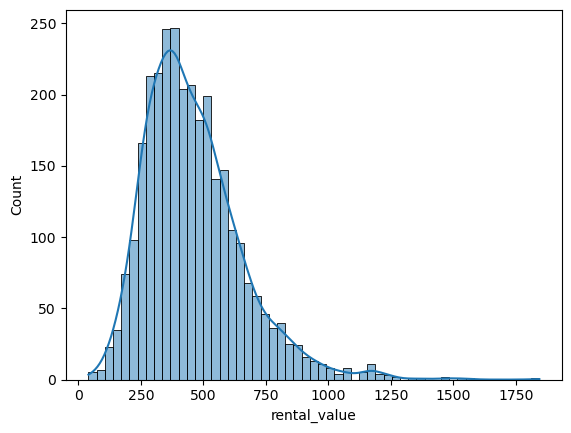

In [19]:
# Histograma of the target variable
sns.histplot(data = dataframe_rental, x = "rental_value", kde = True)

In [14]:
# Correlation between the variables
dataframe_rental.corr()

,rental_value,area_sq_meters,construction_year,location_code,bathroom_qty,kitchen_qyt,district_code
rental_value,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_sq_meters,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
construction_year,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
location_code,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
bathroom_qty,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
kitchen_qyt,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
district_code,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


The correlation coefficient is a statistical metric that describes the degree and direction of a linear relationship between two numerical variables. It ranges from -1 to 1, where:

A correlation value of 1 shows a complete positive linear correlation, which means that as one variable rises, the other increases in the same proportion.

A correlation coefficient of -1 shows a complete negative linear correlation, which means that if one variable grows, the other falls in the same amount.

A correlation value of zero indicates that there is no linear association between the two variabPearson is the most often used correlation coefficient, and it evaluates the linear connection between two variables. Other correlation metrics include Spearman's correlation coefficient, which assesses the monotonic link between two variables, and Kendall's correlation coefficient, which takes into account the agreement across variable ranks.iáveis.

<Axes: xlabel='area_sq_meters', ylabel='rental_value'>

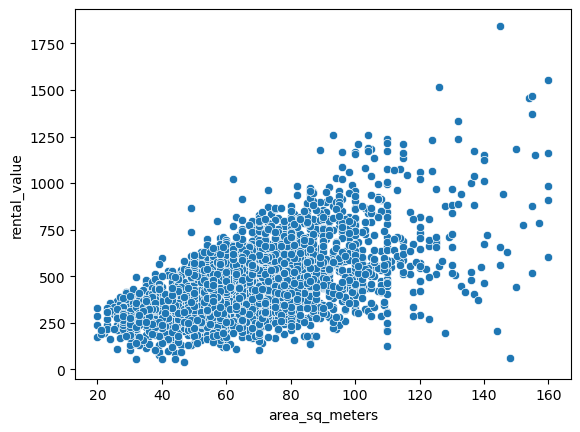

In [21]:
# Let's analyze the relationship between the input variable area_sq_meters and the target variable rental_value
sns.scatterplot(data = dataframe_rental, x = "area_sq_meters", y = "rental_value")

## Simple Linear Regression

Linear regression is a statistical approach for modeling the connection between a dependent variable (also known as the response variable or goal variable) and one or more independent variables.


Linear Regression minimizes the sum of quadratic errors between observed and predicted values by estimating the coefficients of the best-fitting equatio

There are two main types of linear regression:

Simple Linear Regression: In this scenario, just one independent variable is involved. The Simple Linear Regression equation is written as follows:Y = 
Y = a + b

Y is the dependent variable, X is the independent variable, an is the linear coefficient (intercept), b is the angular coefficient (slope), and ε is the random error.

Multiple Linear Regression: In this situation, there are at least two independent variables. The equation is stated as follows:

mo:

Y = a + b1X1 + b2X2 + ... + bnX

Where Y is the dependent variable, X1, X2, ..., Xn are the independent variables, a is the linear coefficient (intercept), b1, b2, ..., bn are the angular coefficients (slopes) and ε is the random error.

Linear regression is frequently used in a variety of fields, including economics, social sciences, biology, and engineering, to forecast outcomes, assess causal linkages, and discover elements that contribute to a particular event.


Furthermore, it is an important tool in data analysis and machine learning, where it is utilized to create predictive model.
ivos.

## Construction of the OLS (Ordinary Least Squares) Model with Statsmodels in Python

In [23]:
dataframe_rental.head()

,rental_value,area_sq_meters,construction_year,location_code,bathroom_qty,kitchen_qyt,district_code
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [33]:
# Separate independent variable (X) and dependent variable (y)
y = dataframe_rental["rental_value"]
X = dataframe_rental["area_sq_meters"]

In [34]:
# Add a constant to the independent variable
X = sm.add_constant(X)

In [35]:
# Create the regression model
rental_model = sm.OLS(y, X)

The sm.OLS(y, X) method is part of the Statsmodels package, a Python library for statistical analysis. The OLS function fits a linear regression model by minimizing the sum of squared errors between observed and predicted values.

The sm.OLS(y, X) method accepts two major arguments:

y: An array or pandas Series containing the dependent variable (response or target variable). It is the variable you wish to predict or explain using the independent variables.

X: Array or Pandas DataFrame containing the independent variables (explanatory or predictive variables). These are the variables you will use to explain or predict the dependent variable.


https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [30]:
# Fit the regression model
rental_result = rental_model.fit()

In [31]:
print(rental_result.summary())

                            OLS Regression Results                            
Dep. Variable:           rental_value   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          6.84e-275
Time:                        22:58:50   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            133.6988      8.750     15.

## Interpreting Statistical Model Result with Statsmodels

The table above summarizes the model's different statistics. We shall investigate one of them, R².

The coefficient of determination (R²) measures how well a regression model matches observable data. It runs from 0 to 1 and indicates how much of the overall variance in the dependent variable is explained by the regression modelThe interpretation of R² is as follows.

R² = 0 indicates that the regression model explains no variance in the dependant variable. This implies that the model is ineffective in predicting or explaining the variable of interest.

R² = 1: The regression model fully explains the variation in the dependent variable. This shows that the model fits the data flawlessly and is particularly effective for predicting or explaining the variable of interes0 < R² < 1: The regression model explains some of the variation in the dependent variable. A higher R² value indicates that the model accurately fits the data and can predict or explain the variable of interest.

A high R² does not always indicate an adequate model or causal link between variables. High R² values may indicate irrelevant variables, multicollinearity, or overfitting. As a result, before making final findings, further statistics must be evaluated and the model diagnosed.
dos</a>.

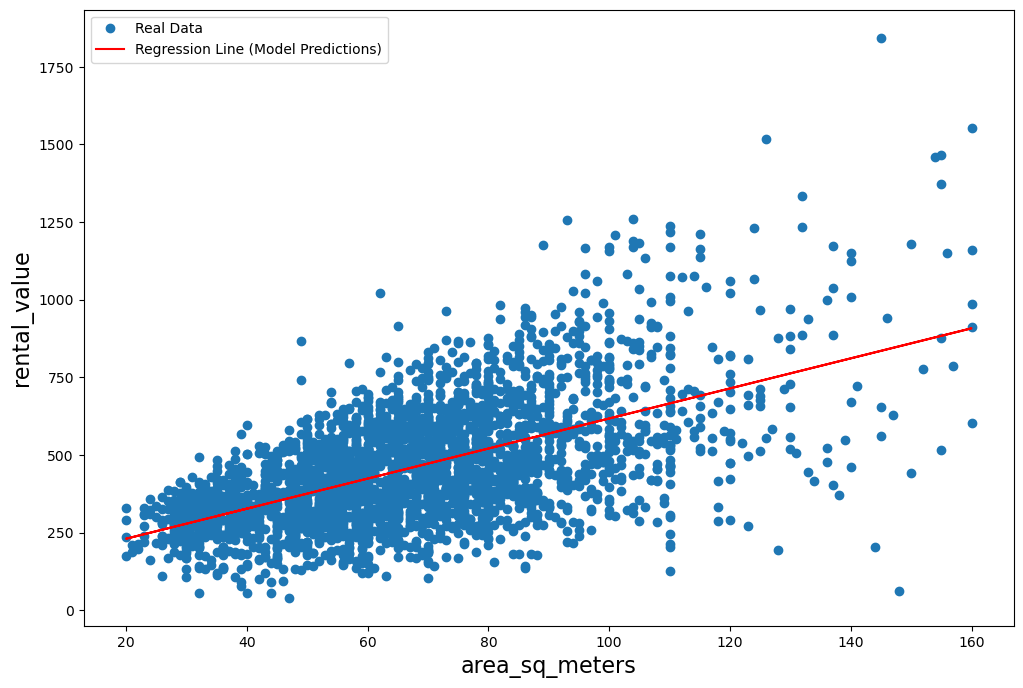

In [32]:
# Plot
plt.figure(figsize = (12, 8))
plt.xlabel("area_sq_meters", size = 16)
plt.ylabel("rental_value", size = 16)
plt.plot(X["area_sq_meters"], y, "o", label = "Real Data")
plt.plot(X["area_sq_meters"], rental_result.fittedvalues, "r-", label = "Regression Line (Model Predictions)")
plt.legend(loc = "best")
plt.show()

## Conclusion

The area (in m2) of properties clearly correlates with their rental value. Our model's coefficient of determination (R²) of just 0.34 suggests that the variance in rental value cannot be explained only by the property's area.

The optimal approach would be to employ more input variables to develop the model in order to determine whether other factors impact rental value.

It's crucial to note that correlation does not indicate causation, therefore the change in rent value cannot be solely attributed to the property's neighborhood. To investigate causation, we must Casual Analisys.

In a sis.

In a Regression Project we must validate the assumptions (of which there are several) before using the model to draw conclusions.

# End